In [1]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
import functions as f

In [2]:
# Creating datasets of jigsaw sets
jigsaw_1 = os.listdir('Dataset/Jigsaw_1')
jigsaw_2 = os.listdir('Dataset/Jigsaw_2')
jigsaw_3 = os.listdir('Dataset/Jigsaw_3')
jigsaw_4 = os.listdir('Dataset/Jigsaw_4')

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4677.JPG - Found 4 puzzle pieces
  Piece 0: shape=(943, 835, 3)


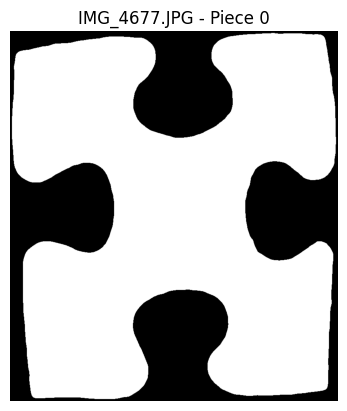

  Piece 1: shape=(1113, 951, 3)


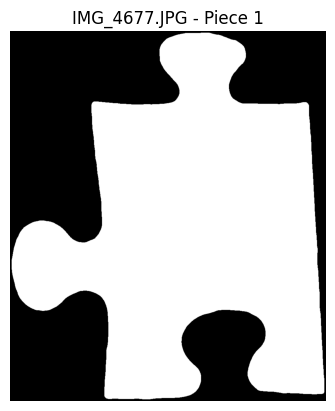

  Piece 2: shape=(923, 704, 3)


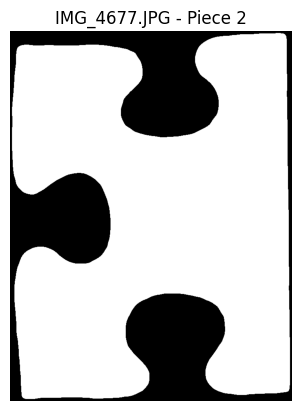

  Piece 3: shape=(1257, 786, 3)


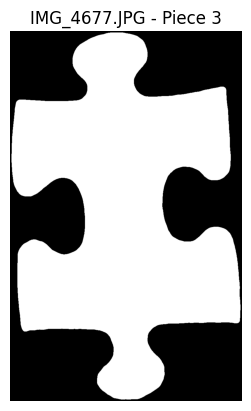

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4678.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1130, 838, 3)


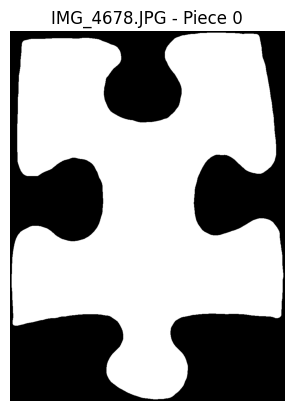

  Piece 1: shape=(1017, 903, 3)


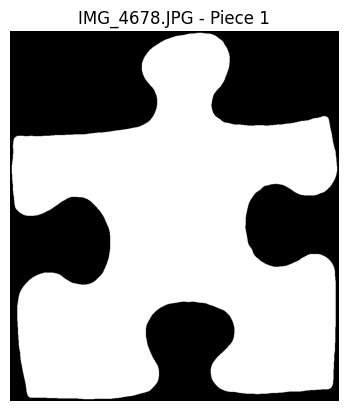

  Piece 2: shape=(1050, 1216, 3)


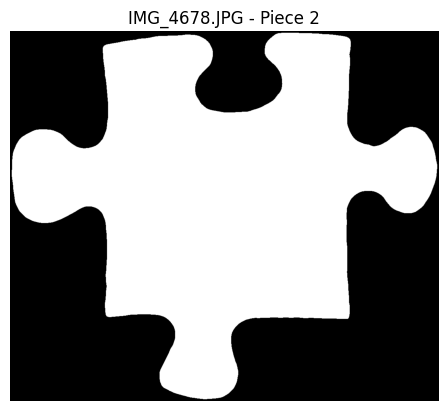

  Piece 3: shape=(1085, 977, 3)


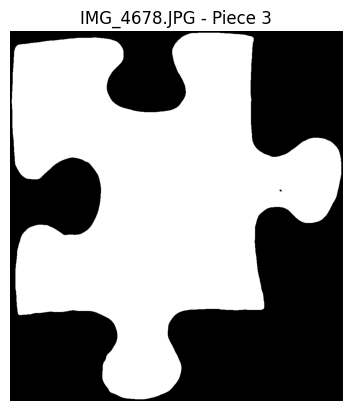

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4679.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1173, 981, 3)


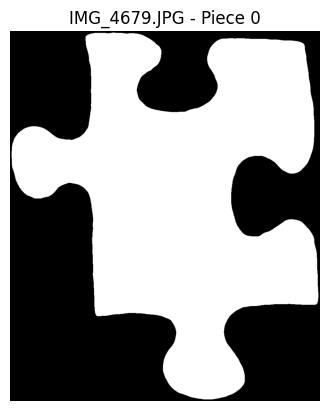

  Piece 1: shape=(1228, 869, 3)


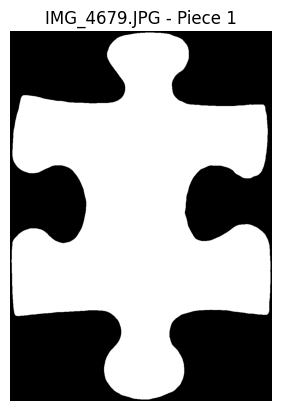

  Piece 2: shape=(1252, 1193, 3)


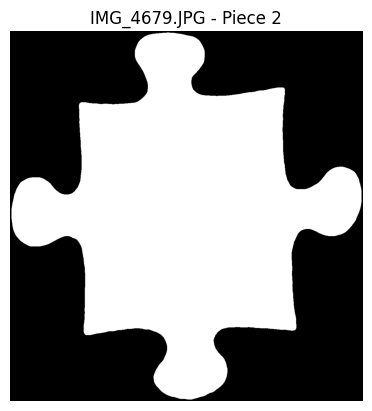

  Piece 3: shape=(1269, 773, 3)


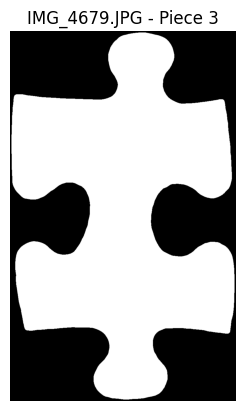

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4680.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1118, 1063, 3)


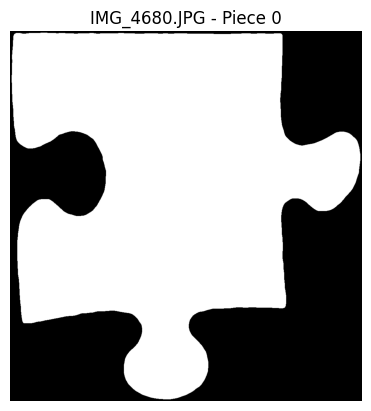

  Piece 1: shape=(1140, 969, 3)


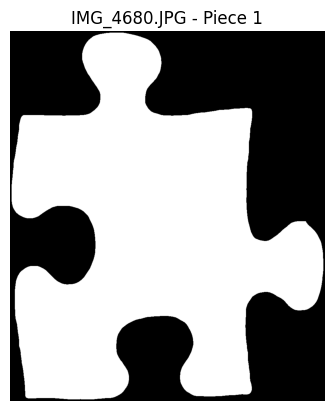

  Piece 2: shape=(1264, 1226, 3)


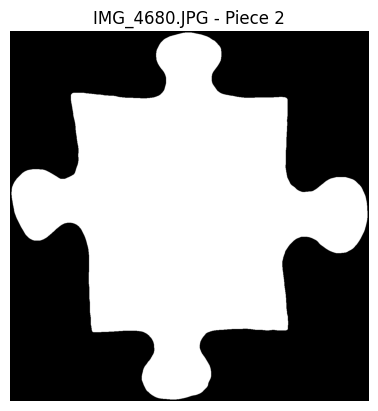

  Piece 3: shape=(1231, 942, 3)


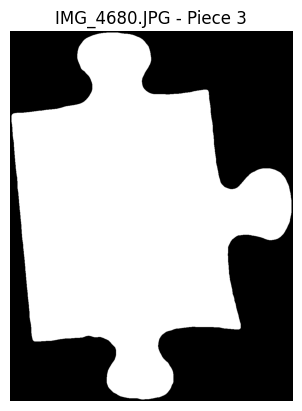

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4681.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1134, 1075, 3)


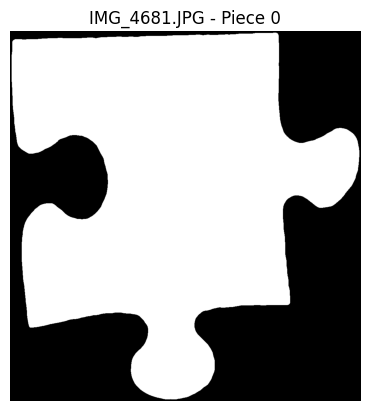

  Piece 1: shape=(1146, 971, 3)


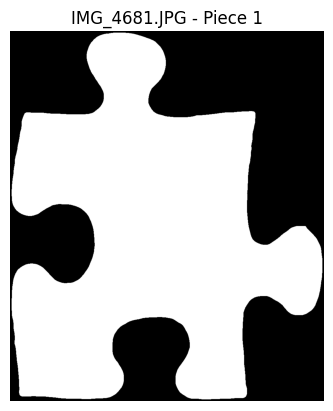

  Piece 2: shape=(1229, 936, 3)


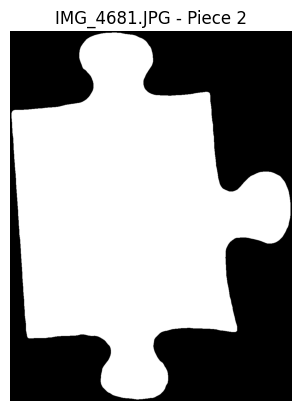

  Piece 3: shape=(1257, 1227, 3)


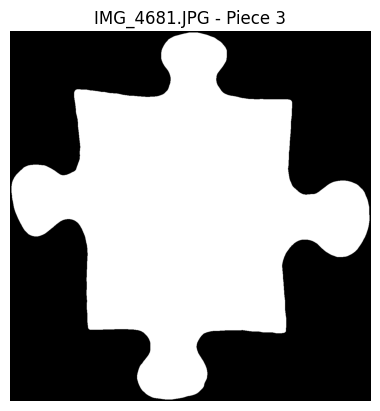

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4682.JPG - Found 4 puzzle pieces
  Piece 0: shape=(945, 836, 3)


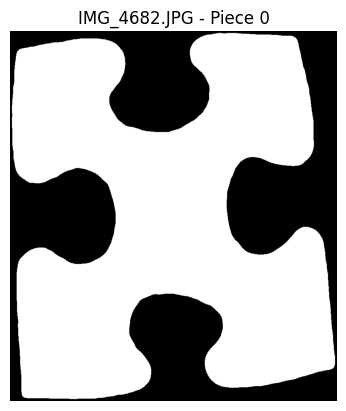

  Piece 1: shape=(1067, 778, 3)


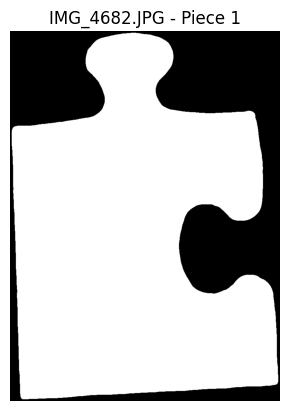

  Piece 2: shape=(1041, 974, 3)


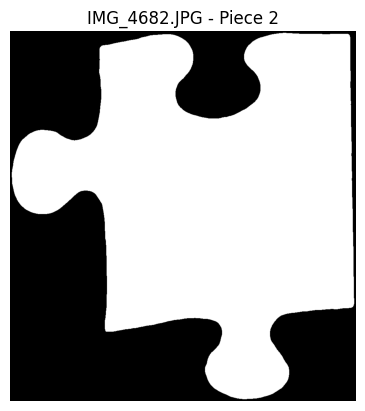

  Piece 3: shape=(1085, 949, 3)


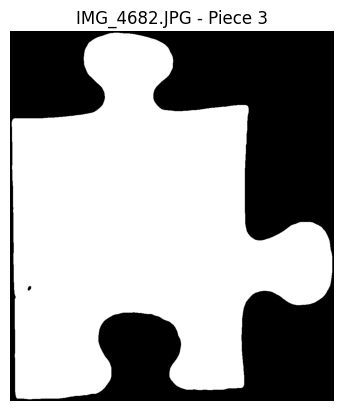

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4683.JPG - Found 4 puzzle pieces
  Piece 0: shape=(953, 745, 3)


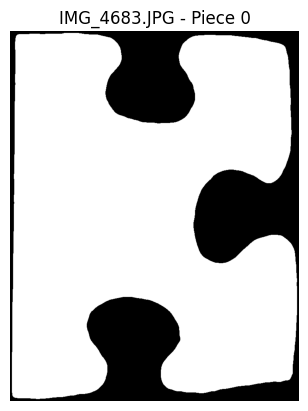

  Piece 1: shape=(1191, 1120, 3)


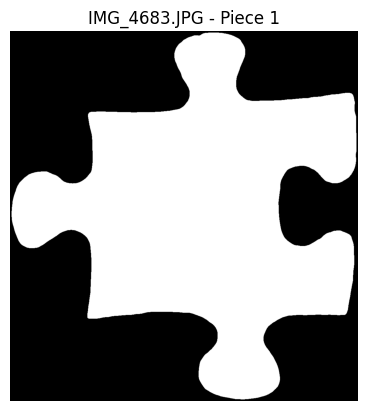

  Piece 2: shape=(1084, 779, 3)


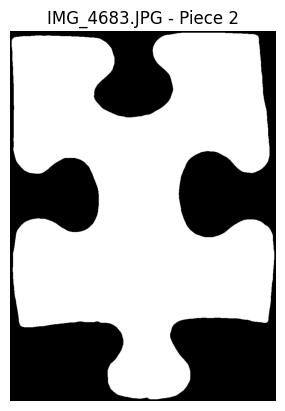

  Piece 3: shape=(1018, 1170, 3)


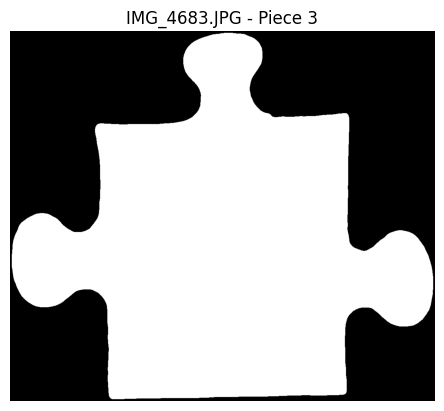

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4684.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1148, 958, 3)


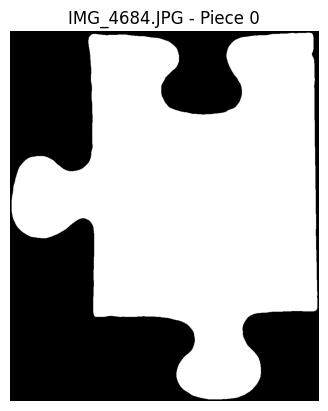

  Piece 1: shape=(1024, 852, 3)


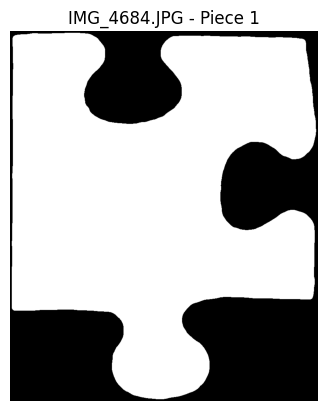

  Piece 2: shape=(1115, 780, 3)


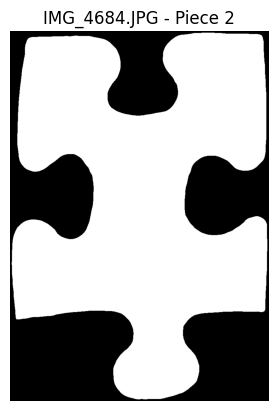

  Piece 3: shape=(1067, 786, 3)


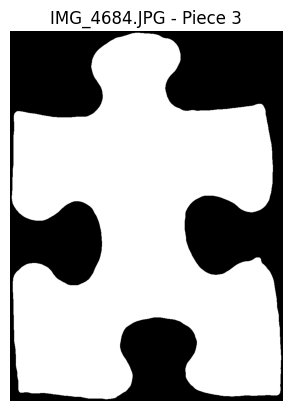

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4685.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1077, 777, 3)


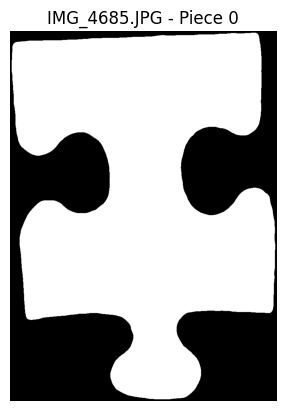

  Piece 1: shape=(1131, 763, 3)


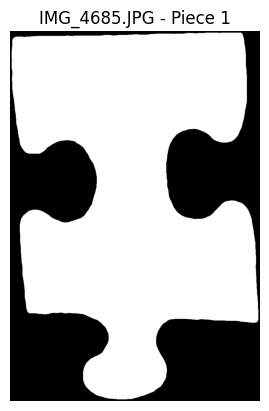

  Piece 2: shape=(866, 986, 3)


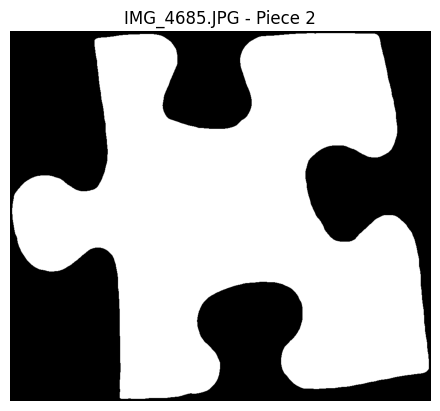

  Piece 3: shape=(1054, 679, 3)


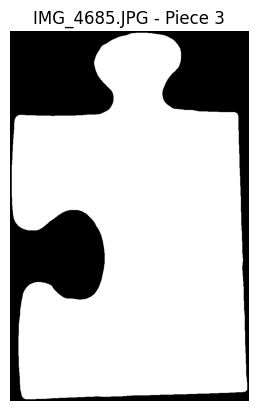

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4686.JPG - Found 4 puzzle pieces
  Piece 0: shape=(1109, 1247, 3)


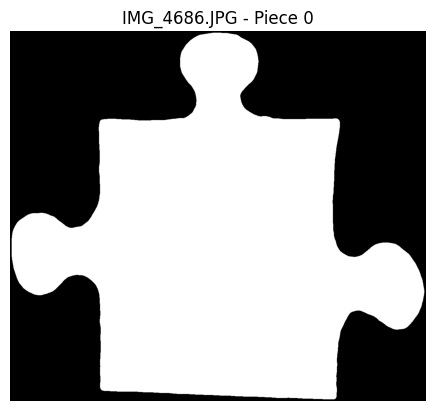

  Piece 1: shape=(1345, 723, 3)


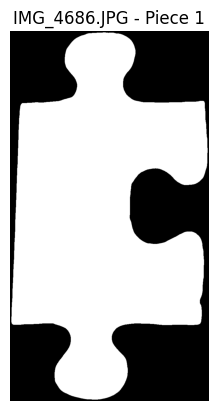

  Piece 2: shape=(889, 1159, 3)


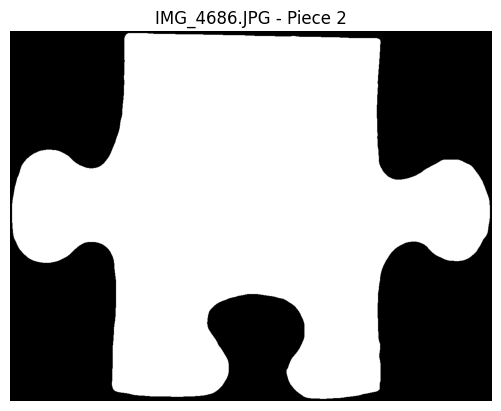

  Piece 3: shape=(1192, 880, 3)


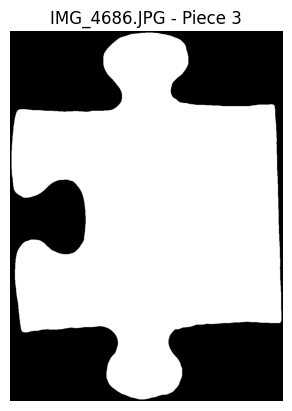

  Found 4 pieces after filtering (min_area: 60964)
Processing: IMG_4687.JPG - Found 4 puzzle pieces
  Piece 0: shape=(884, 766, 3)


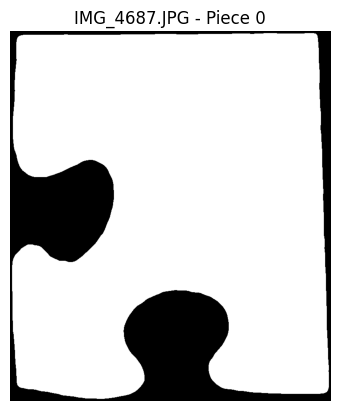

  Piece 1: shape=(885, 756, 3)


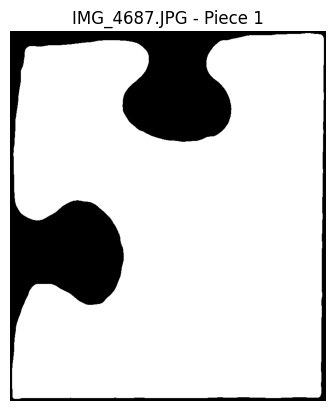

  Piece 2: shape=(1110, 882, 3)


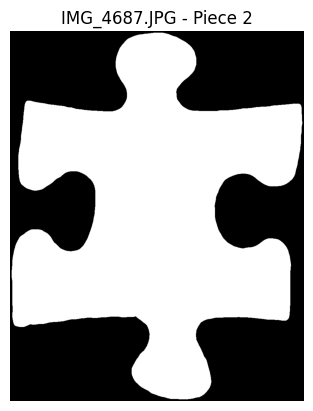

  Piece 3: shape=(1287, 937, 3)


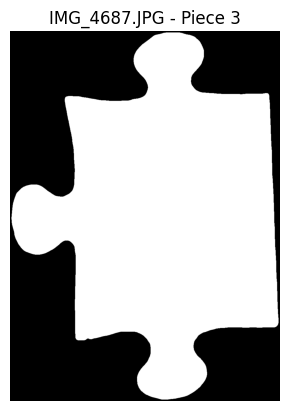

  Found 2 pieces after filtering (min_area: 60964)
Processing: IMG_4688.JPG - Found 2 puzzle pieces
  Piece 0: shape=(853, 910, 3)


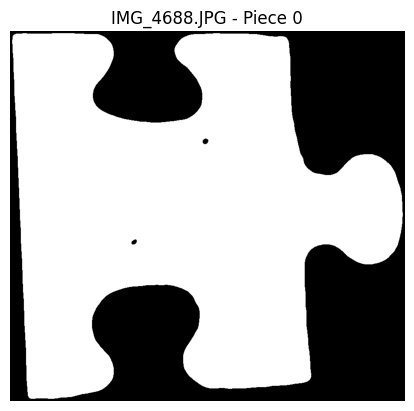

  Piece 1: shape=(1304, 952, 3)


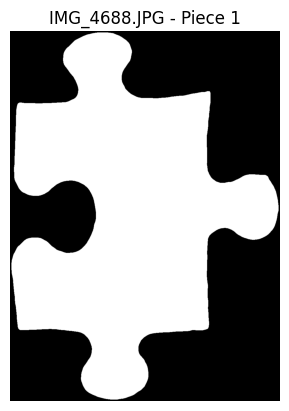

In [3]:
for piece in jigsaw_2:
    piece_path = os.path.join('Dataset/Jigsaw_2', piece)
    I = cv2.imread(piece_path)
    if I is not None:
        U = f.transform_colorspace(I)
        mask = f.transform_blur_and_thresh(U)
        result = f.segment_contours_cropping(mask, I)
        
        if isinstance(result, tuple) and len(result) == 2:
            if isinstance(result[0], np.ndarray) and isinstance(result[1], np.ndarray):
                pieces = [result]
            else:
                pieces = result
        else:
            pieces = result
        
        print(f"Processing: {piece} - Found {len(pieces)} puzzle pieces")
        
        for idx, (cropped_img, cropped_mask) in enumerate(pieces):
            print(f"  Piece {idx}: shape={cropped_img.shape}")
            #final = f.transform_convert_clean(cropped_img, cropped_mask)
            plt.imshow(cv2.cvtColor(cropped_mask, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"{piece} - Piece {idx}")
            plt.show()
    else:
        print(f"Could not read image: {piece_path}")